<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbers from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [1]:
# Import Required Libariries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [2]:
# Create the nlp tokenizer for further processing. 

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [3]:
# Use the word count function from class lecture.

def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts of words in the document set.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

### Clean the Data

In [4]:
# Import the data.

file = './data/yelp_coffeeshop_review_data.csv'

shops = pd.read_csv(file)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Clean up the star rating column and return the value as integer. 

shops['star_rating_cleaned'] = shops['star_rating'].apply(lambda x: int(x.strip()[0]))
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_cleaned
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4


In [6]:
# Separate the dates from the full review text into its own column.

shops['dates_cleaned'] = shops['full_review_text'].apply(lambda x: x.strip().split(' ')[0])
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_cleaned,dates_cleaned
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,12/3/2016


In [7]:
# Step 1 in cleaning the full reviews. Remove the dates from the beginning. 

full_review_text_cleaned = []

for index in range(len(shops['full_review_text'])):
    drop_text = shops['dates_cleaned'][index]
    clean_text = shops['full_review_text'][index].replace(drop_text, '').strip()
    full_review_text_cleaned.append(clean_text)

shops['full_review_text_cleaned'] = full_review_text_cleaned
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_cleaned,dates_cleaned,full_review_text_cleaned
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,11/25/2016,1 check-in Love love loved the atmosphere! Eve...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,11/25/2016,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,12/3/2016,1 check-in They are located within the Northcr...


In [8]:
# Step 2 - Clean the digits from and the check-in text from reviews.

shops['full_review_text_cleaned'] = shops['full_review_text_cleaned'].apply(lambda x: x.replace(x[0], '').strip() if x[0].isdigit() else x)
shops['full_review_text_cleaned'] = shops['full_review_text_cleaned'].apply(lambda x: x.replace('check-ins', '').strip())
shops['full_review_text_cleaned'] = shops['full_review_text_cleaned'].apply(lambda x: x.replace('check-in', '').strip())
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_cleaned,dates_cleaned,full_review_text_cleaned
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,11/25/2016,Love love loved the atmosphere! Every corner o...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,11/30/2016,Listed in Brunch Spots I loved the eclectic an...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,11/25/2016,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,12/3/2016,They are located within the Northcross mall sh...


In [9]:
# Step 3 - Apply lowercase to all reviews and keep only alphanumeric characters and numbers. (optional)

# shops['full_review_text_cleaned'] = shops['full_review_text_cleaned'].apply(lambda x: x.lower())
# shops['full_review_text_cleaned'] = shops['full_review_text_cleaned'].apply(lambda x: re.sub('[^a-zA-Z 0-9]', '', x))
# shops.head()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### Initial Tokenization and Analysis

In [10]:
# Create good vs bad column based on the rating value.  

shops['good_vs_bad'] = ['good' if x >= 4 else 'bad' for x in shops['star_rating_cleaned']]
shops['good'] = shops['good_vs_bad'].str.contains('good', case=False)
shops['bad'] = shops['good_vs_bad'].str.contains('bad', case=False)
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_cleaned,dates_cleaned,full_review_text_cleaned,good_vs_bad,good,bad
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,11/25/2016,Love love loved the atmosphere! Every corner o...,good,True,False
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust...",good,True,False
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,11/30/2016,Listed in Brunch Spots I loved the eclectic an...,good,True,False
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,11/25/2016,Very cool decor! Good drinks Nice seating How...,bad,False,True
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,12/3/2016,They are located within the Northcross mall sh...,good,True,False


In [11]:
# Make tokens using the Tokenizer Pipe
# I noticed that some token lists have an empty space character.
# This addition to the function removes the empty spaces before assemblying token list.

tokens = []
empty = ' '

for doc in tokenizer.pipe(shops['full_review_text_cleaned']):
    doc_tokens = [token.text for token in doc if token.text != empty]
    tokens.append(doc_tokens)
    
shops['spaCy_tokens'] = tokens
shops['spaCy_tokens'].head()

0    [Love, love, loved, the, atmosphere!, Every, c...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [Listed, in, Brunch, Spots, I, loved, the, ecl...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [They, are, located, within, the, Northcross, ...
Name: spaCy_tokens, dtype: object

In [12]:
# Initial look at the rankings.

wc = count(shops['spaCy_tokens'])
print(wc.shape)
wc.head(10)

(44589, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
48,the,6520,27779,1.0,0.035934,0.035934,0.856092
71,and,6804,25748,2.0,0.033307,0.069241,0.893382
35,a,6181,22085,3.0,0.028569,0.097810,0.811581
20,I,5469,19780,4.0,0.025587,0.123397,0.718093
10,to,5631,16904,5.0,0.021867,0.145264,0.739364
8,of,5087,12495,6.0,0.016163,0.161427,0.667936
89,is,4955,11748,7.0,0.015197,0.176624,0.650604
15,was,3743,9539,8.0,0.012339,0.188963,0.491465
73,in,4429,8901,9.0,0.011514,0.200478,0.581539
27,for,4326,8244,10.0,0.010664,0.211142,0.568015


After performing the initial tokenization we are left with 44589 unique words.

(44589, 7) (37777, 7) (17628, 7)


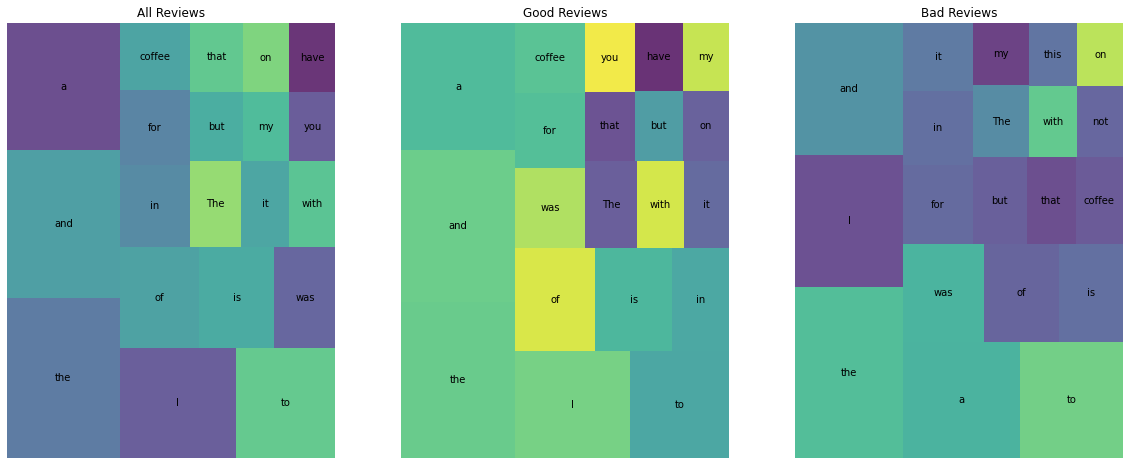

In [13]:
# Use the Function for all reviews, good reviews only, and bad reviews only

wc = count(shops['spaCy_tokens'])
wc_good = count(shops[shops['good'] == 1]['spaCy_tokens'])
wc_bad = count(shops[shops['bad'] == 1]['spaCy_tokens'])
print(wc.shape, wc_good.shape, wc_bad.shape)

# Get top 20 word occurences for each set of data

wc_top20 = wc[wc['rank'] <= 20]
wc_good_top20 = wc_good[wc_good['rank'] <= 20]
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Good Reviews')
squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

Good reviews have 37777 unique words, bad reviews have 17628 unique words.

### Removing the stop words

In [14]:
# Start with removing the stop words.

tokens = []
empty = ' '

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(shops['full_review_text_cleaned']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.text != empty):
            doc_tokens.append(token.text)

    tokens.append(doc_tokens)

shops['spaCy_tokens_v2'] = tokens
shops['spaCy_tokens_v2'].head()

0    [Love, love, loved, atmosphere!, corner, coffe...
1    [Listed, Date, Night:, Austin,, Ambiance, Aust...
2    [Listed, Brunch, Spots, loved, eclectic, homey...
3    [cool, decor!, Good, drinks, Nice, seating, Ho...
4    [located, Northcross, mall, shopping, center, ...
Name: spaCy_tokens_v2, dtype: object

In [15]:
wc_v2 = count(shops['spaCy_tokens_v2'])
print(wc_v2.shape)
wc_v2.head(10)

(43859, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
10,coffee,3988,7315,1.0,0.018965,0.018965,0.523634
88,place,3010,4233,2.0,0.010975,0.029940,0.395221
173,like,1983,2812,3.0,0.007291,0.037230,0.260373
386,good,1872,2421,4.0,0.006277,0.043507,0.245798
137,great,1846,2317,5.0,0.006007,0.049514,0.242384
473,it's,1386,1857,6.0,0.004815,0.054329,0.181985
345,I'm,1367,1774,7.0,0.004599,0.058928,0.179491
303,I've,1154,1463,8.0,0.003793,0.062721,0.151523
836,little,1214,1459,9.0,0.003783,0.066504,0.159401
30,love,1118,1369,10.0,0.003549,0.070053,0.146796


(43859, 7) (37093, 7) (17038, 7)


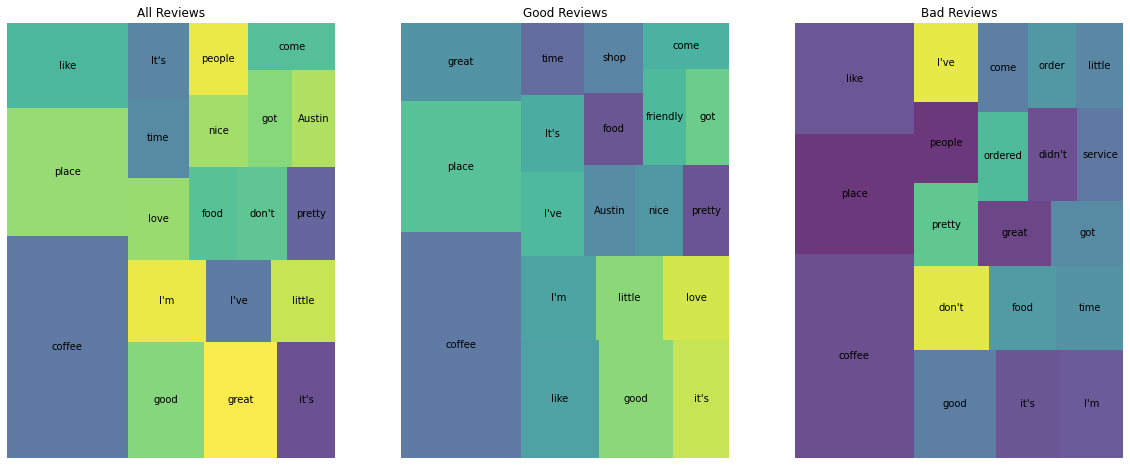

In [16]:
# Use the Function for all reviews, good reviews only, and bad reviews only

wc_v2 = count(shops['spaCy_tokens_v2'])
wc_good_v2 = count(shops[shops['good'] == 1]['spaCy_tokens_v2'])
wc_bad_v2 = count(shops[shops['bad'] == 1]['spaCy_tokens_v2'])
print(wc_v2.shape, wc_good_v2.shape, wc_bad_v2.shape)

# Get top 20 word occurences for each set of data

wc_top20_v2 = wc_v2[wc_v2['rank'] <= 20]
wc_good_top20_v2 = wc_good_v2[wc_good_v2['rank'] <= 20]
wc_bad_top20_v2 = wc_bad_v2[wc_bad_v2['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20_v2['pct_total'], label=wc_top20_v2['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Good Reviews')
squarify.plot(sizes=wc_good_top20_v2['pct_total'], label=wc_good_top20_v2['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_top20_v2['pct_total'], label=wc_bad_top20_v2['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

After removing the stop words, good reviews have 37093 unique words, bad reviews have 17038 unique words.

### Lemmatization of the words

In [17]:
tokens = []
empty = ' '

# Return lemmas
for doc in tokenizer.pipe(shops['full_review_text_cleaned'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.pos_ != 'PRON') & (token.text != empty):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)
    
shops['spaCy_tokens_v3'] = tokens
shops['spaCy_tokens_v3'].head()

0    [Love, love, love, atmosphere!, corner, coffee...
1    [Listed, Date, Night:, Austin,, Ambiance, Aust...
2    [Listed, Brunch, Spots, love, eclectic, homey,...
3    [cool, decor!, Good, drink, Nice, seat, Howeve...
4    [locate, Northcross, mall, shop, center, face,...
Name: spaCy_tokens_v3, dtype: object

In [18]:
wc_v3 = count(shops['spaCy_tokens_v3'])
print(wc_v3.shape)
wc_v3.head(10)

(40354, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
12,coffee,4022,7458,1.0,0.019336,0.019336,0.528099
82,place,3227,4713,2.0,0.012219,0.031555,0.423713
167,like,2115,3057,3.0,0.007926,0.039481,0.277705
366,good,1948,2538,4.0,0.006580,0.046061,0.255777
511,come,1788,2380,5.0,0.006171,0.052231,0.234769
129,great,1862,2339,6.0,0.006064,0.058296,0.244485
450,it's,1386,1857,7.0,0.004815,0.063110,0.181985
149,try,1464,1821,8.0,0.004721,0.067831,0.192227
7,order,1268,1784,9.0,0.004625,0.072457,0.166492
327,I'm,1367,1774,10.0,0.004599,0.077056,0.179491


(40354, 7) (34105, 7) (15385, 7)


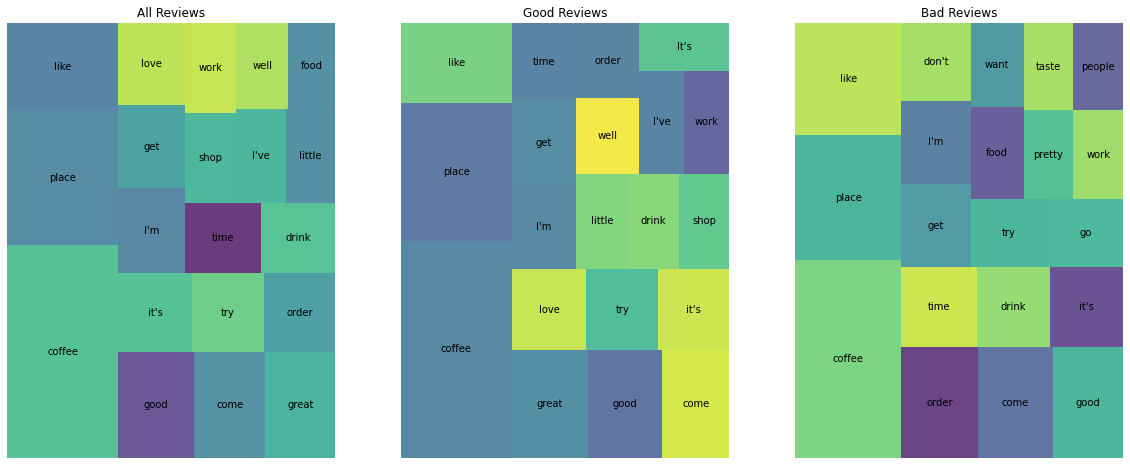

In [19]:
# Use the Function for all reviews, good reviews only, and bad reviews only

wc_v3 = count(shops['spaCy_tokens_v3'])
wc_good_v3 = count(shops[shops['good'] == 1]['spaCy_tokens_v3'])
wc_bad_v3 = count(shops[shops['bad'] == 1]['spaCy_tokens_v3'])
print(wc_v3.shape, wc_good_v3.shape, wc_bad_v3.shape)

# Get top 20 word occurences for each set of data

wc_top20_v3 = wc_v3[wc_v3['rank'] <= 20]
wc_good_top20_v3 = wc_good_v3[wc_good_v3['rank'] <= 20]
wc_bad_top20_v3 = wc_bad_v3[wc_bad_v3['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20_v3['pct_total'], label=wc_top20_v3['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Good Reviews')
squarify.plot(sizes=wc_good_top20_v3['pct_total'], label=wc_good_top20_v3['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_top20_v3['pct_total'], label=wc_bad_top20_v3['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

After removing the lemmatization, good reviews have 34105 unique words, bad reviews have 15385 unique words.

### Statistical Stopword Trimming

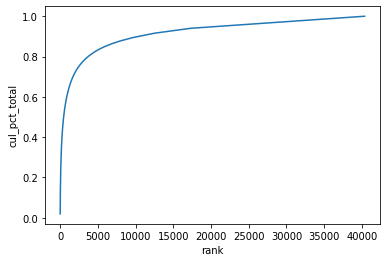

In [20]:
# Checking the cummulative word distribution after the final step of tokenization.

sns.lineplot(x='rank', y='cul_pct_total', data=wc_v3);

In [21]:
# Getting the basic statistics.

wc_v3['appears_in_pct'].describe()

count    40354.000000
mean         0.001128
std          0.007297
min          0.000131
25%          0.000131
50%          0.000131
75%          0.000394
max          0.528099
Name: appears_in_pct, dtype: float64

In [22]:
# Tree-Map w/ Words that appear in a least 1% of documents.  

wc = wc_v3[wc_v3['appears_in_pct'] >= 0.01]

In [23]:
# Getting the list of the words which we will drop for the last round of analysis.

words_to_keep = []

for index in range(len(wc['word'])):
    word = wc['word'].iloc[index]
    words_to_keep.append(word)

In [24]:
# Adding few more attributes in this last step. 
# Dropping all the number like words.
# Dropping all the words outside of vocabulary.

tokens = []
empty = ' '

# Return lemmas
for doc in tokenizer.pipe(shops['full_review_text_cleaned']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text in words_to_keep) & (token.is_stop == False) & (token.is_punct == False) & (token.pos_ != 'PRON') & (token.text != empty) & (token.like_num == False) & (token.is_oov == False):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)
    
shops['spaCy_tokens_v4'] = tokens
shops['spaCy_tokens_v4'].head()

0    [Love, love, corner, coffee, shop, drink, pret...
1    [Listed, Austin, Love, Definitely, pretty, des...
2    [Listed, decor, doesn't, want, swing, drink, c...
3    [cool, Good, Nice, extra, loud, mix, French, l...
4    [east, plenty, friendly, easy, pick, choose, p...
Name: spaCy_tokens_v4, dtype: object

In [25]:
wc_v4 = count(shops['spaCy_tokens_v4'])
print(wc_v4.shape)
wc_v4.head(30)

(634, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
5,coffee,3988,7315,1.0,0.045161,0.045161,0.523634
22,place,3010,4233,2.0,0.026134,0.071295,0.395221
65,like,1983,2812,3.0,0.017361,0.088656,0.260373
117,good,1872,2421,4.0,0.014947,0.103602,0.245798
21,great,1846,2317,5.0,0.014305,0.117907,0.242384
138,it's,1386,1857,6.0,0.011465,0.129372,0.181985
120,I'm,1367,1774,7.0,0.010952,0.140324,0.179491
109,I've,1154,1463,8.0,0.009032,0.149356,0.151523
232,little,1214,1459,9.0,0.009008,0.158364,0.159401
10,love,1118,1369,10.0,0.008452,0.166816,0.146796


(634, 7) (634, 7) (626, 7)


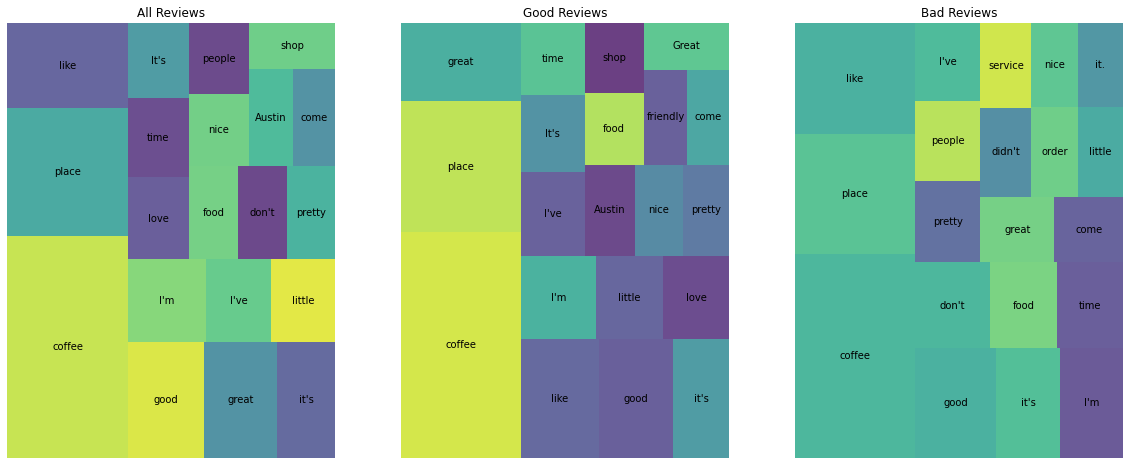

In [26]:
# Use the Function for all reviews, good reviews only, and bad reviews only

wc_v4 = count(shops['spaCy_tokens_v4'])
wc_good_v4 = count(shops[shops['good'] == 1]['spaCy_tokens_v4'])
wc_bad_v4 = count(shops[shops['bad'] == 1]['spaCy_tokens_v4'])
print(wc_v4.shape, wc_good_v4.shape, wc_bad_v4.shape)

# Get top 20 word occurences for each set of data

wc_top20_v4 = wc_v4[wc_v4['rank'] <= 20]
wc_good_top20_v4 = wc_good_v4[wc_good_v4['rank'] <= 20]
wc_bad_top20_v4 = wc_bad_v4[wc_bad_v4['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20_v4['pct_total'], label=wc_top20_v4['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Good Reviews')
squarify.plot(sizes=wc_good_top20_v4['pct_total'], label=wc_good_top20_v4['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_top20_v4['pct_total'], label=wc_bad_top20_v4['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [27]:
# Combine the dataframes to see what's the difference between good and bad places.

diff = wc_good_v4.merge(wc_bad_v4, left_on='word', right_on='word')
print(diff.shape)
diff.head()

(626, 13)


,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y
0,coffee,3227,5830,1.0,0.045684,0.045684,0.525570,761,1485,1.0,0.043219,0.043219,0.515583
1,place,2417,3365,2.0,0.026368,0.072053,0.393648,593,868,2.0,0.025262,0.068481,0.401762
2,great,1613,2024,3.0,0.015860,0.087913,0.262704,233,293,13.0,0.008527,0.199709,0.157859
3,like,1446,2003,4.0,0.015696,0.103609,0.235505,537,809,3.0,0.023545,0.092026,0.363821
4,good,1468,1882,5.0,0.014747,0.118356,0.239088,404,539,4.0,0.015687,0.107712,0.273713


In [28]:
diff['rel_diff'] = diff['pct_total_x'] - diff['pct_total_y']
diff.sort_values(by=['rel_diff'], ascending=False).head(10)

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y,rel_diff
2,great,1613,2024,3.0,0.015860,0.087913,0.262704,233,293,13.0,0.008527,0.199709,0.157859,0.007333
19,Great,790,859,20.0,0.006731,0.241061,0.128664,46,51,181.0,0.001484,0.704336,0.031165,0.005247
8,love,968,1195,9.0,0.009364,0.159088,0.157655,150,174,30.0,0.005064,0.308498,0.101626,0.004300
40,delicious,534,558,41.0,0.004373,0.351362,0.086971,33,33,279.0,0.000960,0.822206,0.022358,0.003412
17,friendly,869,893,18.0,0.006998,0.227599,0.141531,113,124,56.0,0.003609,0.419034,0.076558,0.003389
32,favorite,524,600,33.0,0.004702,0.315472,0.085342,42,47,202.0,0.001368,0.734255,0.028455,0.003334
48,perfect,438,480,49.0,0.003761,0.383152,0.071336,26,28,321.0,0.000815,0.858789,0.017615,0.002946
12,Austin,853,986,13.0,0.007726,0.191937,0.138925,154,170,34.0,0.004948,0.328405,0.104336,0.002779
10,It's,876,1063,11.0,0.008330,0.176460,0.142671,154,193,27.0,0.005617,0.292841,0.104336,0.002713
0,coffee,3227,5830,1.0,0.045684,0.045684,0.525570,761,1485,1.0,0.043219,0.043219,0.515583,0.002465


These are the 10 words that yield the biggest difference between the good and bad coffee shops.

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

